## K-MEANS CLUSTERING

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Importing the dataset
data=pd.read_csv('Mall_Customers.csv')
x=data.iloc[:, [3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

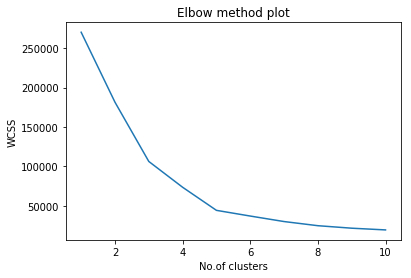

In [6]:
#Using the elbow method to find the optimal no.of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method plot')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#Trainig the k-means model
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


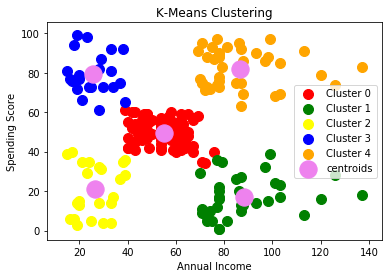

In [11]:
#Visualisation
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='blue', label='Cluster 3')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='violet', label='centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## HEIRARCHICAL CLUSTERING

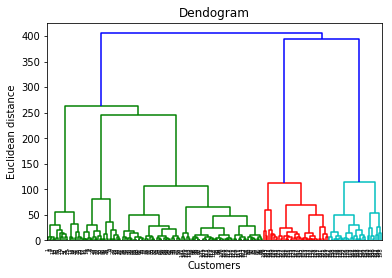

In [12]:
#Using the dendogram to find optimal no.of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
#Trainig the model
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(x)

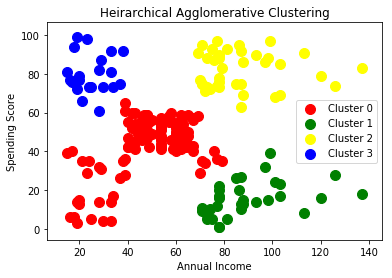

In [22]:
#Visualisation
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='blue', label='Cluster 3')
plt.title('Heirarchical Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()